In [1]:
from capsa import MVEWrapper
import tensorflow as tf
from tensorflow import keras
from keras import layers
from helper import * 

In [2]:
(x_train, y_train), (x_test, y_test) = generate_moon_data_classification()

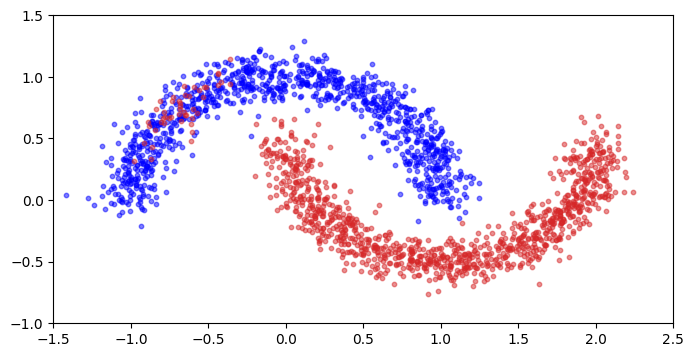

In [3]:
plot_for_moons(x_train, y_train)

In [28]:
model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=(2,)),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(8, "relu"),
            tf.keras.layers.Dense(2,"sigmoid"),
        ]
    )

In [29]:
wrapped_model = MVEWrapper(model)

In [30]:
wrapped_model.compile(
            optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy()]
                     )

In [7]:
wrapped_model.fit(x_train,tf.one_hot(y_train,2),epochs=50,batch_size=5)

Epoch 1/50
(5, 2)
(5, 2)
8400/8400 [==============================] - 20s 2ms/step - mve_loss: 0.2164 - mve_binary_accuracy: 0.8980
Epoch 2/50
8400/8400 [==============================] - 16s 2ms/step - mve_loss: 0.0692 - mve_binary_accuracy: 0.9752
Epoch 3/50
8400/8400 [==============================] - 18s 2ms/step - mve_loss: 0.0644 - mve_binary_accuracy: 0.9776
Epoch 4/50
8400/8400 [==============================] - 17s 2ms/step - mve_loss: 0.0623 - mve_binary_accuracy: 0.9777
Epoch 5/50
3243/8400 [==========>...................] - ETA: 10s - mve_loss: 0.0678 - mve_binary_accuracy: 0.9752

KeyboardInterrupt: 

In [31]:
mesh_grid = get_grid()
#output = wrapped_model(mesh_grid)

In [27]:
def plot_and_save(index):
    
    output = wrapped_model(mesh_grid)
    
    plt.figure(figsize=(8,4))
    plt.xlim(-1.5, 2.5); plt.ylim(-1, 1.5)
    i = y_train == 0
    plt.scatter(x_train[i,0][::20], x_train[i,1][::20], s=10, alpha=0.5, c="b",zorder=-1)
    plt.scatter(x_train[~i,0][::20], x_train[~i,1][::20], s=10, alpha=0.5, c='#d62728', zorder=-1)

    plt.scatter(mesh_grid[:,0],mesh_grid[:,1],c=output.aleatoric[:,1],zorder=-2)
    
    plt.savefig(str(index)+".png")

In [12]:
mesh_grid.shape

(10000, 2)

In [56]:
wrapped_model(mesh_grid).y_hat

<tf.Tensor: shape=(10000, 2), dtype=float32, numpy=
array([[9.99999464e-01, 7.93865865e-07],
       [9.99999344e-01, 9.42208601e-07],
       [9.99999225e-01, 1.11827308e-06],
       ...,
       [6.07175604e-02, 9.99017835e-01],
       [7.90129229e-02, 9.98586297e-01],
       [1.02221295e-01, 9.97965455e-01]], dtype=float32)>